In [1]:
import sys, os
sys.path.append(f'../../code')
path_to_json = os.getcwd()

from IPython.display import display, Markdown

In [2]:
import json
def load_case(path):
    display(Markdown(f'## {path}'))
    with open(path, 'r+') as file: bundle = json.load(file)
    print('Temperature:', bundle['temperature'])
    return bundle

display(Markdown('# Low temperature'))
files = {'mc': 'mc-lT.json', 'a1': 'a1-lT.json'}
print("Files: ", files)

mc = load_case(files['mc'])
alg1 = load_case(files['a1'])

# Low temperature

Files:  {'mc': 'mc-lT.json', 'a1': 'a1-lT.json'}


## mc-lT.json

Temperature: 0.5


## a1-lT.json

Temperature: 0.5


Generating theoretical configurations: 100%|██████████| 8/8 [00:00<00:00, 45776.85it/s]

[99899.46239146034, 100.5376085396623]


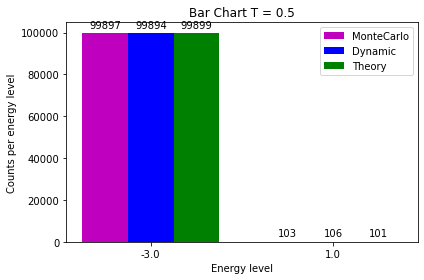

In [3]:
import ising
from ising import *
import matplotlib.pyplot as plt

mc_m_counts = count_variables(mc["magnetization_sample"])
alg1_m_counts = count_variables(alg1["magnetization_sample"])
mc_engy_counts = count_variables(mc["energy_sample"])
alg1_engy_counts = count_variables(alg1["energy_sample"])

chain = Chain(size=alg1["number of spins"], temperature = alg1["temperature"])
n_samples = len(alg1["energy_sample"])
theory_engy, theory_m = theoretical_distributions(chain)
theory_engy_counts, multinom_avg, multinom_std = theoretical_quantities(n_samples, theory_engy)
multiplicity_mc, std_mc, mc_engy_counts = std_algorithms(mc_engy_counts, multinom_avg, theory_engy, multinom_std)
multiplicity_alg1, std_alg1, alg1_engy_counts = std_algorithms(alg1_engy_counts, multinom_avg, theory_engy, multinom_std)

fig, ax = plt.subplots()
labels = mc_engy_counts.keys()
x = np.arange(len(labels)) 
width = 0.25
rects1 = ax.bar(x, list(mc_engy_counts.values()), width, yerr=std_mc, align='center',
                label='MonteCarlo', color='m')
rects2 = ax.bar(x + width, list(alg1_engy_counts.values()), width, yerr=std_alg1, align='center',
                label='Dynamic', color='b')
print(theory_engy_counts)
theory_engy_counts_adjusted = [round(counts) for counts in theory_engy_counts]
rects3 = ax.bar(x + width * 2, theory_engy_counts_adjusted, width, yerr=multinom_std, align='center',
                label='Theory', color='g')

ax.set_title('Bar Chart T = 0.5')
ax.set_ylabel('Counts per energy level')
ax.set_xlabel('Energy level')
ax.set_xticks(x + width)
ax.set_xticklabels([i for i in labels])
ax.legend()
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)
fig.tight_layout()

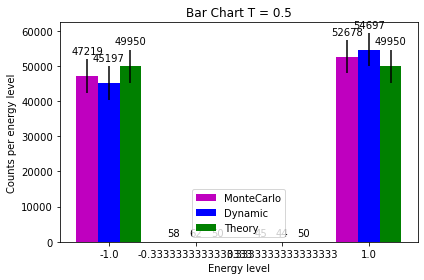

In [4]:
theory_m_counts, multinom_avg, multinom_std = theoretical_quantities(n_samples, theory_m)
multiplicity_mc, std_mc, mc_m_counts = std_algorithms(mc_m_counts, multinom_avg, theory_m, multinom_std)
multiplicity_alg1, std_alg1, alg1_m_counts = std_algorithms(alg1_m_counts, multinom_avg, theory_m, multinom_std)

fig, ax = plt.subplots()
labels = mc_m_counts.keys()
x = np.arange(len(labels)) 
width = 0.25
rects1 = ax.bar(x, list(mc_m_counts.values()), width, yerr=std_mc, align='center',
                label='MonteCarlo', color='m')
rects2 = ax.bar(x + width, list(alg1_m_counts.values()), width, yerr=std_alg1, align='center',
                label='Dynamic', color='b')
theory_m_counts_adjusted = [round(counts) for counts in theory_m_counts]
rects3 = ax.bar(x + width * 2, theory_m_counts_adjusted, width, yerr=multinom_std, align='center',
                label='Theory', color='g')

ax.set_title('Bar Chart T = 0.5')
ax.set_ylabel('Counts per energy level')
ax.set_xlabel('Energy level')
ax.set_xticks(x + width)
ax.set_xticklabels([i for i in labels])
ax.legend()
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)
fig.tight_layout()

Text(0.5, 1.0, 'M Correlation MonteCarlo')

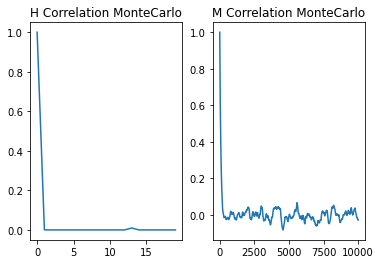

In [5]:
mc_engy_corr = acrl(mc["energy_sample"], 20)
mc_m_corr = acrl(mc["magnetization_sample"], 10000)
fig_kde, axes = plt.subplots(1, 2)
axes[0].plot(mc_engy_corr)
axes[0].set_title("H Correlation MonteCarlo")
axes[1].plot(mc_m_corr)
axes[1].set_title("M Correlation MonteCarlo")

Text(0.5, 1.0, 'M Correlation Alg1')

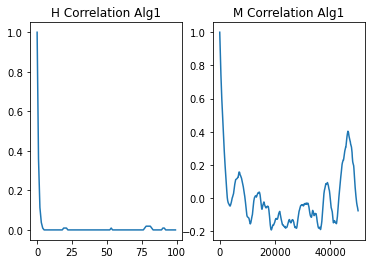

In [6]:
alg1_engy_corr = acrl(alg1["energy_sample"], 100)
alg1_m_corr = acrl(alg1["magnetization_sample"], 50000)
fig_kde, axes = plt.subplots(1, 2)
axes[0].plot(alg1_engy_corr)
axes[0].set_title("H Correlation Alg1")
axes[1].plot(alg1_m_corr)
axes[1].set_title("M Correlation Alg1")

In [7]:
display(Markdown('# Reject lack of fit iif distance < upper bound'))
display(Markdown('# H0: distance >= eps, Ha: dist < eps'))
print(f'Energy MC - Theory:', theoretical_test(f_obs=list(mc_engy_counts.values()), theory_prob=theory_engy[:,1], n_samples=n_samples,eps=0.05))
print(f'Magnetization MC - Theory:', theoretical_test(f_obs=list(mc_m_counts.values()), theory_prob=theory_m[:,1], n_samples=n_samples,eps=0.05))
print(f'Energy Alg1 - Theory:', theoretical_test(f_obs=list(alg1_engy_counts.values()), theory_prob=theory_engy[:,1], n_samples=n_samples,eps=0.05))
print(f'Magnetization Alg1 - Theory:', theoretical_test(f_obs=list(alg1_m_counts.values()), theory_prob=theory_m[:,1], n_samples=n_samples,eps=0.05))

# Reject lack of fit iif distance < upper bound

# H0: distance >= eps, Ha: dist < eps

Energy MC - Theory: {'Distance': 1.2126743407869333e-09, 'Upper_bound': 0.0024999835661552506, 'pvalue': 0.0}
Magnetization MC - Theory: {'Distance': 0.001490043106337172, 'Upper_bound': 0.002216620912601096, 'pvalue': 3.486723571182945e-38}
Energy Alg1 - Theory: {'Distance': 5.96754409318709e-09, 'Upper_bound': 0.0024999630178033946, 'pvalue': 0.0}
Magnetization Alg1 - Theory: {'Distance': 0.004512519183772044, 'Upper_bound': 0.002008357123562128, 'pvalue': 9.135396104730855e-12}


In [8]:
from lrtest import *
display(Markdown('# H0: the sample comes from the theoretical distribution'))

e_probs = theory_engy[:, 1]
assert np.sum(e_probs) == 1.0
mc_e_counts = list(mc_engy_counts.values())
a1_e_counts = list(alg1_engy_counts.values())
assert np.sum(mc_e_counts) == np.sum(a1_e_counts)
ex_e_counts = np.random.multinomial(np.sum(a1_e_counts), e_probs)

print((e_probs, mc_e_counts))
print((e_probs, a1_e_counts))

print(f'Energy MC:', one_sample_test(e_probs, mc_e_counts))
print(f'Energy alg1:', one_sample_test(e_probs, a1_e_counts))
print(f'Energy example:', one_sample_test(e_probs, ex_e_counts))
print(f'Magnetization MC:', one_sample_test(theory_m[:,1], np.asarray(list(mc_m_counts.values()))))
print(f'Magnetization alg1:', one_sample_test(theory_m[:,1], np.asarray(list(alg1_m_counts.values()))))

display(Markdown('## $\chi^2$ test'))
print(f'Energy MC:', one_sample_chi_squared(e_probs, mc_e_counts))
print(f'Energy alg1:', one_sample_chi_squared(e_probs, a1_e_counts))
print(f'Energy example:', one_sample_chi_squared(e_probs, ex_e_counts))
print(f'Magnetization MC:', one_sample_chi_squared(theory_m[:,1], np.asarray(list(mc_m_counts.values()))))
print(f'Magnetization alg1:', one_sample_chi_squared(theory_m[:,1], np.asarray(list(alg1_m_counts.values()))))


# H0: the sample comes from the theoretical distribution

(array([0.99899462, 0.00100538]), [99897, 103])
(array([0.99899462, 0.00100538]), [99894, 106])
Energy MC: 0.8068366406789192
Energy alg1: 0.5893478485228718
Energy example: 0.5893478485228718
Magnetization MC: 1.2730468631432803e-64
Magnetization alg1: 4.0348505786372947e-196


## $\chi^2$ test

Energy MC: 0.8059118053169871
Energy alg1: 0.5857185896398907
Energy example: 0.5857185896398907
Magnetization MC: 9.713342889653854e-65
Magnetization alg1: 2.7815524250426183e-196


In [10]:
display(Markdown('# H0: the two samples came from the same distribution'))
print(f'Energy:', z_test(f1=list(mc_engy_counts.values()), f2=list(alg1_engy_counts.values()), n_samples=len(mc["energy_sample"])))
print(f'Magnetization:', z_test(f1=list(mc_m_counts.values()), f2=list(alg1_m_counts.values()), n_samples=len(mc["energy_sample"])))

from two_samples import chi_squared_test
chi_squared_test(mc_e_counts, a1_e_counts)

# H0: the two samples came from the same distribution

Energy: 0.999999356370132
Magnetization: 0.46695324357987256


0.7674201433254498